Abhilash Hedaoo

Task-1 : Prediction using Supervised ML

Question: What will be predicted score if student study for 9.25hrs in a day?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing CSV File into dataframe df

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Visualization of Data

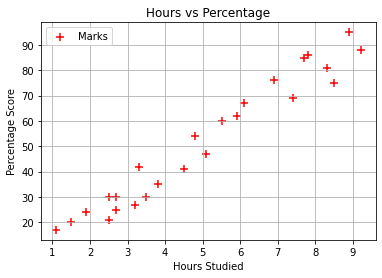

In [7]:
x= df['Hours']
y= df['Scores']

plt.scatter(x,y, label='Marks',color='red', marker = '+', s= 50)

plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.title('Hours vs Percentage')

plt.legend()
plt.grid()
plt.show()

Pair Plot

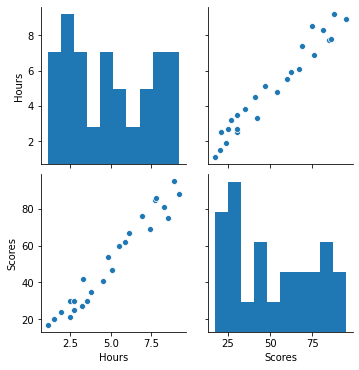

In [8]:
sns.pairplot(df)
plt.show()

Splitting the data for train and test sets (Train 70% and Test 30%)

In [9]:
x = df[['Hours']].values
y = df[['Scores']].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Training the Data

In [11]:
from sklearn.linear_model import LinearRegression
training=LinearRegression()
training.fit(x_train,y_train)
print('Training Completed Successfully')

Training Completed Successfully


Plotting the Regression Line

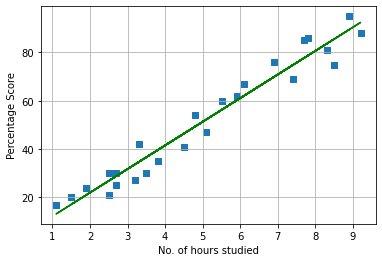

In [12]:
line = training.coef_*x+training.intercept_
plt.scatter(x,y,marker='s')
plt.plot(x,line,c='green');
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

Predicting the Score

In [13]:
print('Training score')
print(training.score(x_train,y_train))
print('Test score')
print(training.score(x_test,y_test))

Training score
0.9484997422695115
Test score
0.9568211104435257


In [14]:
y_pred = training.predict(x_test)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

Question: What will be the predicted score if a student study for 9.25 hrs in a day?

In [15]:
hrs = 9.25
own_pred = training.predict([[hrs]])
print('No of Hours studied:',format(hrs))
print('No of Hours studied:',format(own_pred[0]))

No of Hours studied: 9.25
No of Hours studied: [92.91505723]


Evaluation of Model

In [16]:
from sklearn import metrics
print("Mean Absolute Erroe :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Erroe : 4.419727808027652
Mean Squared Error : 22.96509721270043
Root Mean Squared Error : 4.792191274636315
